Dataset: Biomechanical features of orthopedic patients

link: https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?select=column_2C_weka.csv

Nome do arquivo: 'column_3C_weka.csv'

Classificação por meio do algoritmo árvore de decisão (Decision Tree - Sklearn)

Resumo: Estudos de classificação, com o algoritmo DecisionTreeClassifier (CART)

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [ ]:
# Leitura do arquivo
dataset = pd.read_csv('/content/drive/MyDrive/portfolio_dataScience/column_3C_weka.csv')

In [ ]:
# Visualização do dataset
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [ ]:
# Informações do dataset: índices, nome das colunas, valores nulos e tipos de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
# Valores únicos no atributo alvo
dataset['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [ ]:
# Definição dos atributos preditores e atributo alvo
X = dataset.iloc[:, 0:6]
y = dataset.iloc[:, -1]

In [ ]:
# Separação entre bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 6), (93, 6), (217,), (93,))

In [ ]:
# Concatenação da base de treino para análise exploratória
dados_treino = pd.concat([X_train, y_train], axis=1)

In [ ]:
dados_treino.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
191,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,Spondylolisthesis
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
110,63.900633,13.706204,62.124334,50.194429,114.129243,41.422828,Spondylolisthesis
167,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Spondylolisthesis
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,Hernia
50,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,Hernia
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,Spondylolisthesis
243,34.649922,7.514783,43.000000,27.135140,123.987741,-4.082938,Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia


In [ ]:
# Valores duplicados
dados_treino.loc[dados_treino.duplicated()]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [ ]:
# Indicadores estatísticos
dados_treino.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,61.463466,17.907528,52.866638,43.555938,117.817028,27.127109
std,17.918727,10.484163,18.556101,13.830765,12.881161,40.556667
min,26.147921,-6.554948,14.000000,15.388468,70.082575,-11.058179
25%,46.442078,10.755611,37.967747,33.550662,111.072920,1.630664
50%,59.167612,16.297915,51.000000,42.646703,117.818760,11.463223
75%,74.720746,21.936186,64.429442,53.130102,125.203296,42.810481
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


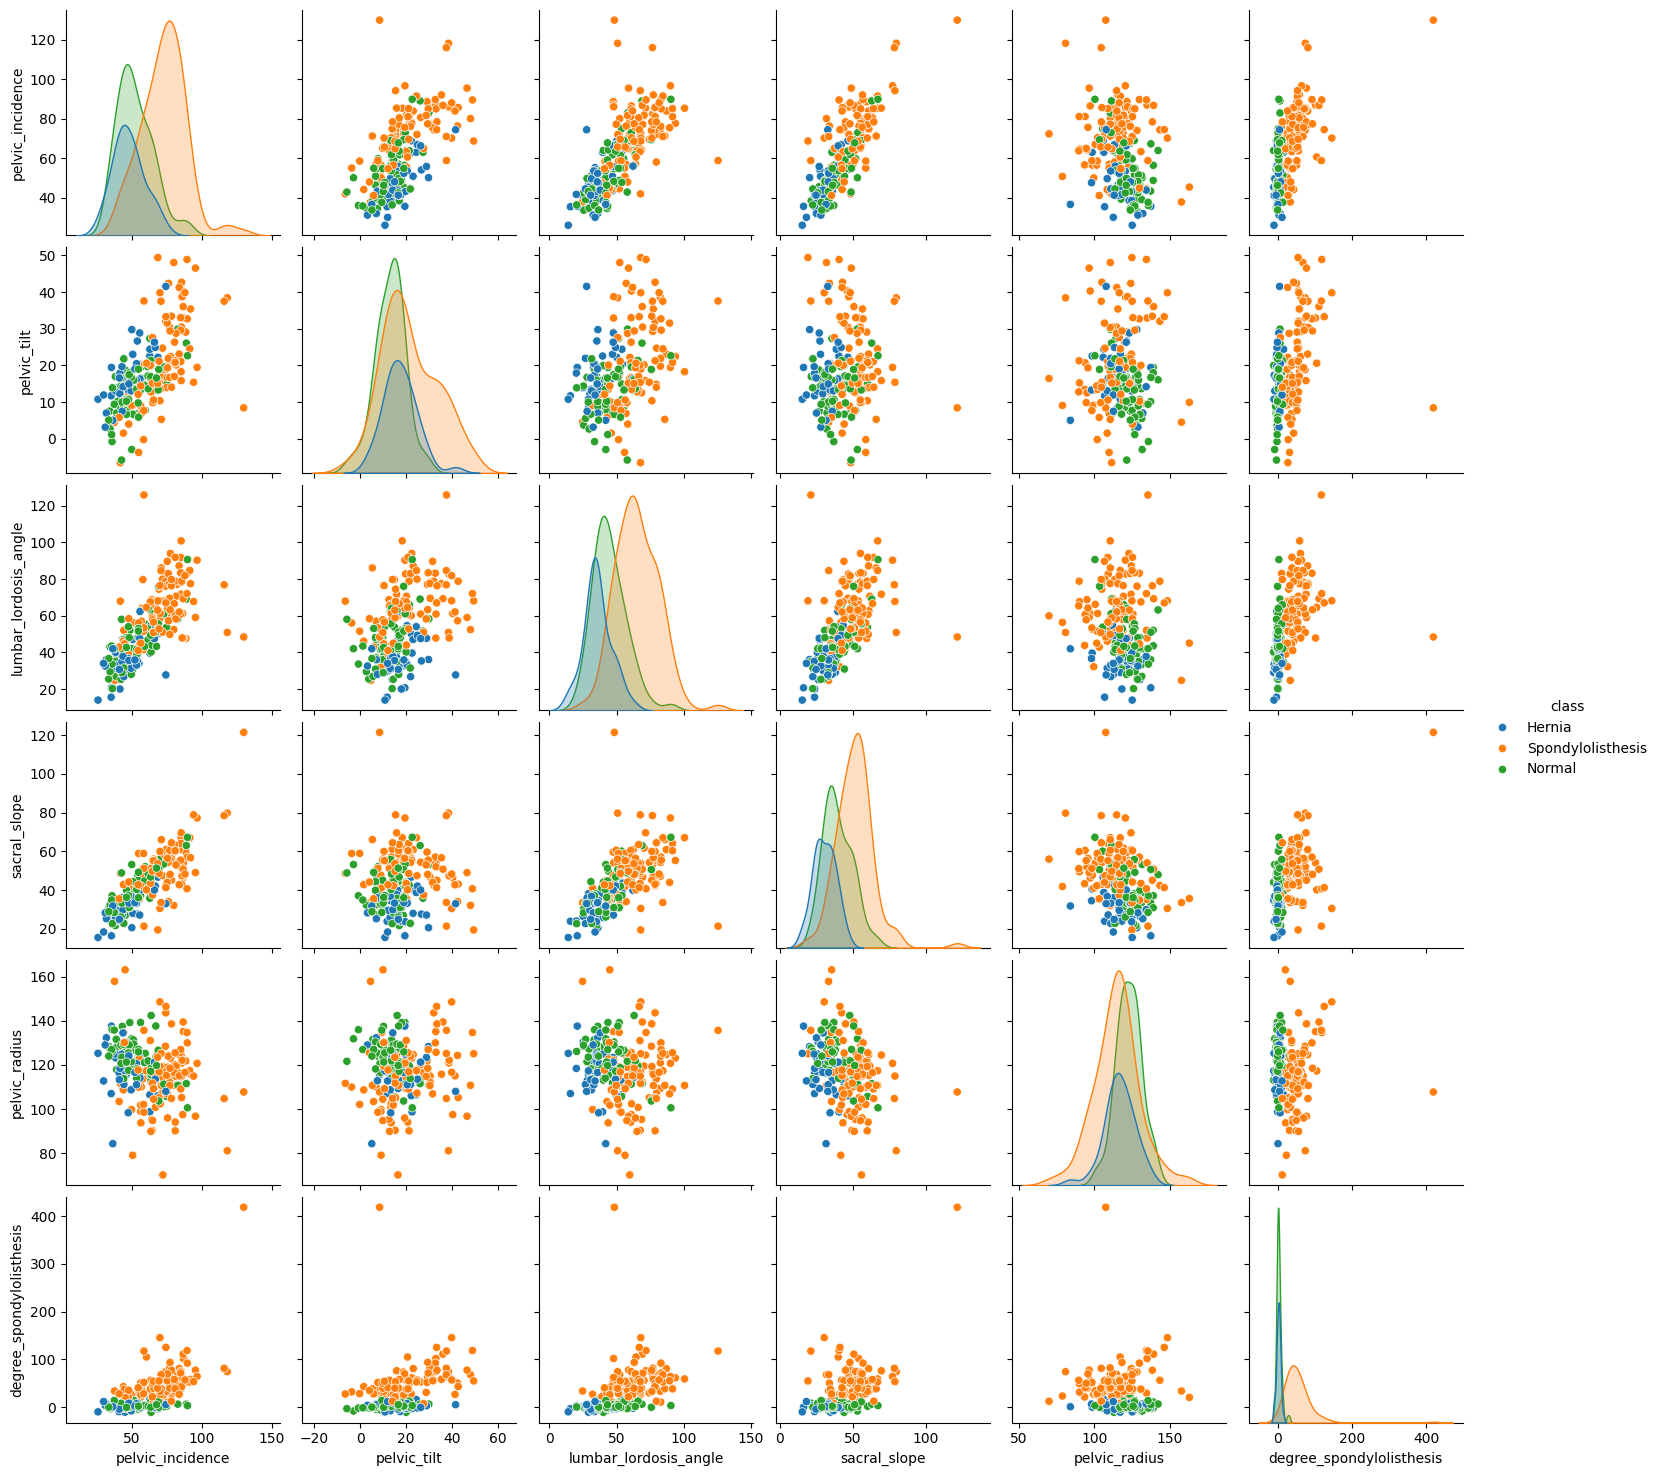

In [ ]:
# Matriz de gráficos de dispersão (scatterplots): verificação de outliers e tendência dos dados por classes
sns.pairplot(data=dados_treino, hue='class')

In [ ]:
dados_treino.loc[dados_treino['degree_spondylolisthesis'] > 400]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


In [ ]:
dados_treino.loc[dados_treino['lumbar_lordosis_angle'] > 120]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Spondylolisthesis


In [ ]:
dados_treino.loc[dados_treino['sacral_slope'] > 120]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


In [ ]:
# Limpeza dos dados outliers da base de treino X_train
X_train.drop([115,197], axis=0, inplace=True)
y_train.drop([115,197], axis=0, inplace=True)

In [ ]:
feature_names = X.columns

In [ ]:
# Modelo de classificação com o critério índice de GINI
modelo_tree_gini = DecisionTreeClassifier(criterion='gini', min_samples_split=50)

In [ ]:
# Treinamento do modelo de classificação com o critério índice de GINI
modelo_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=50)

In [ ]:
# R2: score do modelo de treino do índice de GINI
modelo_tree_gini.score(X_train, y_train)

0.8558139534883721

In [ ]:
# R2: score do modelo de teste do índice de GINI
modelo_tree_gini.score(X_test, y_test)

0.8172043010752689

In [ ]:
# Nome dos atributos preditores (colunas)
feature_names

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [ ]:
# Nome das classes
modelo_tree_gini.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

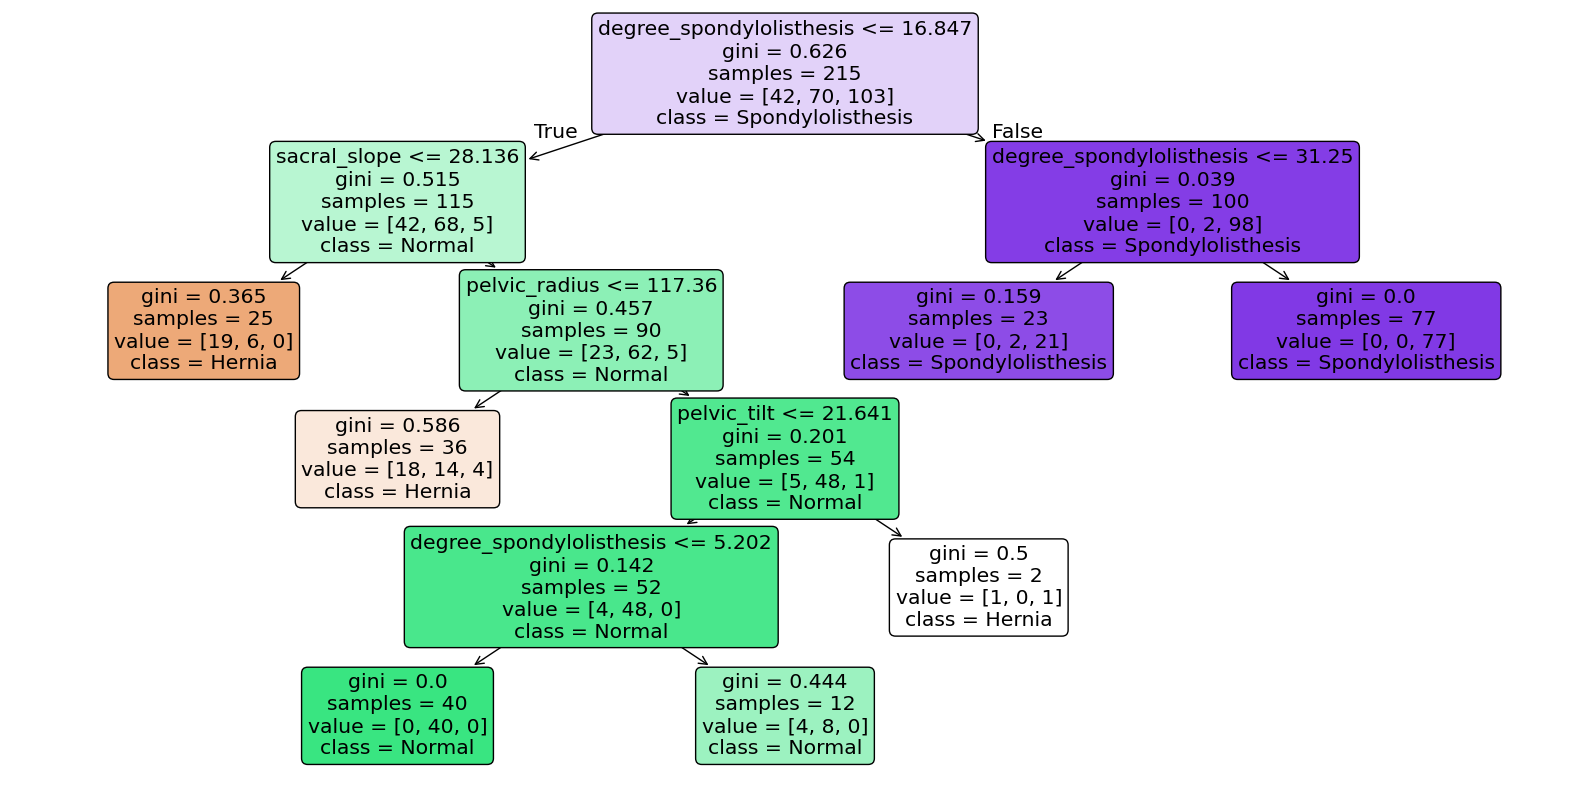

In [ ]:
# Árvore de decisão com o modelo de classificação com Índice GINI
plt.figure(figsize=(20,10))
plot_tree(decision_tree=modelo_tree_gini, feature_names=feature_names, class_names=modelo_tree_gini.classes_, filled=True, rounded=True)
plt.show()

In [ ]:
y_pred_gini = modelo_tree_gini.predict(X_test)
print(classification_report(y_test, y_pred_gini))

                   precision    recall  f1-score   support

           Hernia       0.54      0.72      0.62        18
           Normal       0.79      0.63      0.70        30
Spondylolisthesis       0.98      0.98      0.98        45

         accuracy                           0.82        93
        macro avg       0.77      0.78      0.77        93
     weighted avg       0.83      0.82      0.82        93



In [ ]:
# Modelos de classificação com o critério da entropia
modelo_tree_entropia = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [ ]:
# Treinamento do modelo de classificação classificação com o critério da entropia
modelo_tree_entropia.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [ ]:
# R2: score do modelo de treino com critério da entropia
modelo_tree_entropia.score(X_train, y_train)

0.8930232558139535

In [ ]:
# R2: score do modelo de teste com critério da entropia
modelo_tree_entropia.score(X_test, y_test)

0.8494623655913979

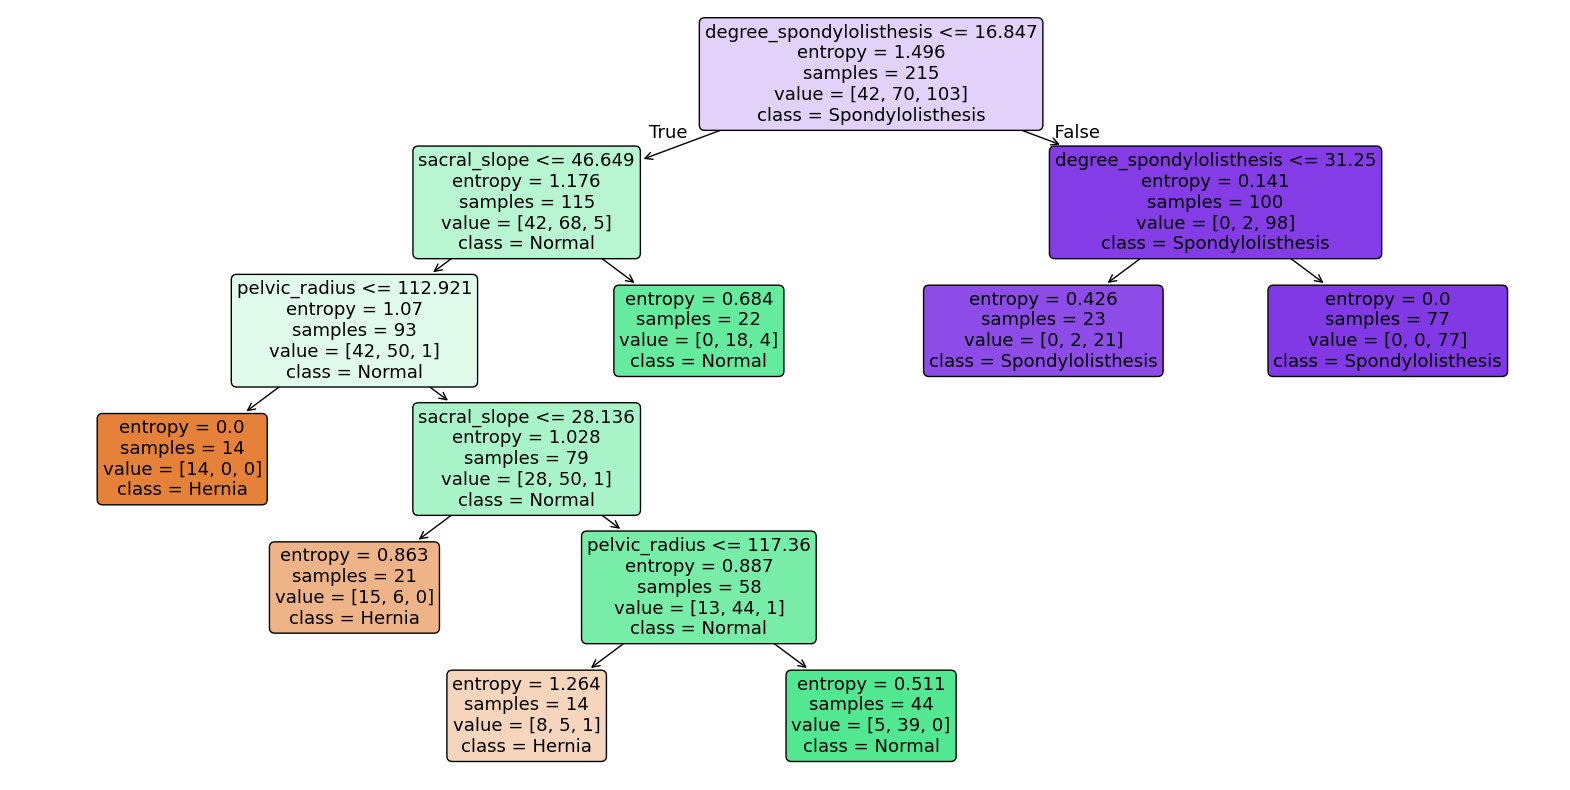

In [ ]:
# Árvore de decisão com o modelo de classificação com Entropia
plt.figure(figsize=(20,10))
plot_tree(decision_tree=modelo_tree_entropia, feature_names=feature_names, class_names=modelo_tree_entropia.classes_, filled=True, rounded=True)
plt.show()

In [ ]:
y_pred_entropia = modelo_tree_entropia.predict(X_test)
print(classification_report(y_test, y_pred_entropia))

                   precision    recall  f1-score   support

           Hernia       0.65      0.72      0.68        18
           Normal       0.79      0.73      0.76        30
Spondylolisthesis       0.98      0.98      0.98        45

         accuracy                           0.85        93
        macro avg       0.80      0.81      0.81        93
     weighted avg       0.85      0.85      0.85        93

